In [4]:
!conda create -n houseprice python=3.10 -y



Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\nibam\Anaconda\envs\houseprice

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/win-64::bzip2-1.0.8-h2bbff1b_6 
  ca-certificates    pkgs/main/win-64::ca-certificates-2025.2.25-haa95532_0 
  expat              pkgs/main/win-64::expat-2.7.1-h8ddb27b_0 
  libffi             pkgs/main/win-64::libffi-3.4.4-hd77b12b_1 
  openssl            pkgs/main/win-64::openssl-3.0.16-h3f729d1_0 
  pip                pkgs/main/noarch::pip-25.1-pyhc872135_2 
  python             pkgs/main/win-64::python-3.10.18-h981015d_0 
  setuptools         pkgs/main/win-64::setuptools-78.1.1-py310haa95532_0 
  sqlite             pkgs/main/win-64::sqlite-3.45.3-h2bbff1b_0 
  tk                 pkgs/main/win-64::tk-8.6.14-h5e9d12e_1 
  tzdata             pkgs/main/noarch::tzdata-2025b-h04d1e81_0 
  ucrt            

In [8]:
!conda install jupyter



^C


In [86]:
import pandas as pd
import numpy as np
import torch
import pickle
from torch import nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [22]:
df = pd.read_csv("house_prices.csv")
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500 sqft,Ready to Move,10 out of 11,Resale,Unfurnished,NaN,NaN,Srushti Siddhi Mangal Murti Complex,1,2,NaN,NaN,NaN
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473 sqft,Ready to Move,3 out of 22,Resale,Semi-Furnished,East,Garden/Park,Dosti Vihar,2,NaN,1 Open,Freehold,NaN
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.0,thane,779 sqft,Ready to Move,10 out of 29,Resale,Unfurnished,East,Garden/Park,Sunrise by Kalpataru,2,NaN,1 Covered,Freehold,NaN
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,NaN,thane,530 sqft,Ready to Move,1 out of 3,Resale,Unfurnished,NaN,NaN,NaN,1,1,NaN,NaN,NaN
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635 sqft,Ready to Move,20 out of 42,Resale,Unfurnished,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,NaN,1 Covered,Co-operative Society,NaN


In [76]:
df = pd.get_dummies("house_prices.csv")

In [72]:
df.columns

Index(['Index', 'Price (in rupees)'], dtype='object')

In [44]:
# Drop rows with missing values (for simplicity)
df = df.select_dtypes(include=[np.number]).dropna()

# Features and target
X = df.drop(['Price (in rupees)'], axis=1)
y = df['Price (in rupees)']


In [50]:
X

,Index
0,0
1,1
2,2
4,4
5,5
...,...
187526,187526
187527,187527
187528,187528
187529,187529


In [78]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)


In [88]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


In [60]:
#Here the are 3 layers, the input, hidden and output layers
model = nn.Sequential(
    nn.Linear(X_train_tensor.shape[1], 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)


In [62]:
#Does actual value compare to predicted values?(MSE)
loss_fn = nn.MSELoss()
#The optimizer adjusts the model’s weights based on the loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [63]:
#goes through the data hundred times to learn it better
epochs = 100
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train_tensor)
    #Compares the model's predictions (y_pred) to the actual house prices (y_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)

    optimizer.zero_grad()
    #Compute how to fix the weights 
    loss.backward()
    #Update the weights
    optimizer.step()
    #Every 10 epochs, print the progress.
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")


Epoch 10/100, Loss: 489426400.0000
Epoch 20/100, Loss: 489380320.0000
Epoch 30/100, Loss: 489314624.0000
Epoch 40/100, Loss: 489222592.0000
Epoch 50/100, Loss: 489098560.0000
Epoch 60/100, Loss: 488938400.0000
Epoch 70/100, Loss: 488739552.0000
Epoch 80/100, Loss: 488500064.0000
Epoch 90/100, Loss: 488219168.0000
Epoch 100/100, Loss: 487896000.0000


In [66]:
model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor)
    test_loss = loss_fn(test_preds, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 2038574720.0000


In [68]:
model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor)
    test_loss = loss_fn(test_preds, y_test_tensor)
    print(f"Test Loss: {test_loss.item():.4f}")


Test Loss: 2038574720.0000


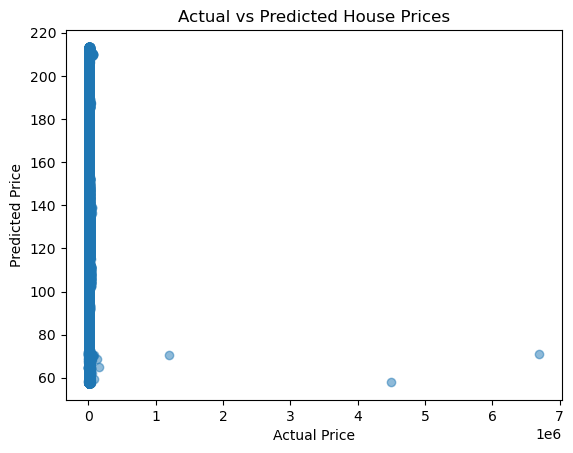

In [70]:
plt.scatter(y_test_tensor.numpy(), test_preds.numpy(), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [90]:
torch.save(model.state_dict(), "model.pth")
